In [69]:
import seaborn as sns

## Multi-stage game

* Stage 1: Established firms decide which technologies to research.
* Stage 2: If a new technology has not been invented, a new entrent can invent it instead. The new entrent decides whether it wants to cooperate with established firms or enter the market as a new firm.
* Stage 3a: Established firms and new entrent cooperate. Establish firm decides whether to produce the new technology or the old technology (based on cost of production differences).
* Stage 3b: Established firms and new entrents compete. New entrent as the better product. Consumer sales are calculated and subtracted from overall cost.
* Stage 4: All firms decide whether to stay in the product market based on profit margin. New entrents need only break even to remain. Established firms must continue to make a profit.

## Decision Theory Notation

### Stage 1 (Modeled on Acemoglu 2012):
> - There are $n$ firms. Each firm makes one choice between small and big. Each firm starts with a market share which is directly proportional to consumer base and marginal profits.
    - For $z$ firms with $E[U] = 0$, the market size benefit $m_z = n  - z$ 
        - $z_1$ is dependent on *p* at $t =1$; $z_2$ is dependent on *s* at $t = 2$ 
        - $1 \lt m_z \lt 0$ 
    - If a firm picks small, they get $1 + \lambda$ in return at time $t = 1$
        - Expected utility, $E[U_1] = (1 + \lambda) * m_z$
    - If a firm picks big, there is a chance *p* that they will get $1 + 2\lambda$ in return at time $t = 1$ or they return 0.
        - $E[U_1] = [p(1 + 2\lambda)] * m_z$ or 0
        - $1 \lt p \lt 0$
    - If a firm picks small, there is a chance *s* that the firm will remain in the market and return the same expected utility from time $ t = 1$ at time $t = 2$, else they will be forced out and return 0.
        - $E[U_2] = [s(1 + \lambda)] * m_z$ or 0
        - $1 \lt s \lt 0$
    - If a firm picks big, they will return standard expected utility $1 + \lambda$ at time $t = 2$.
        - $E[U_2] = (1 + \lambda) * m_z$
    - It is more likely that a firm will remain in the market at $t = 2$ than a firm will succeed at drawing customers with the big pick at $t = 1$.
        - $s \gt p$

Notes: this model doesn't account for cumulative innovations which was included in Acemoglu dealt with completely new lines of technological innovation and this model addresses changes to the same product line which are modeled in incremental changes.

## Code Map

### Stage 1
Functions for calculating probabilities. Should return True if successful at the stage.
>- probability calculators
    - import random
    - user defined variable - success_threshold_t1
    - user defined variable - success_threshold_t2
    - def success_big():
        - p = random.randint(0, 100)
        - if p > success_threshold_t1
            - return True
    - def stay_small():
        - s = random.randint(0, 100)
        - if s > success_threshold_t2
            - return True

Basic code map includes for single firm:
1. Choose between big or small
    - Global user defined variable - $\lambda$
    - Global variable - firm_choice
    - If small, calculate expected utility
        - $1 + \lambda$
    - If big, calculate probability of success
        - if success_big() == True
            - calculate expected utility
            - $1 + 2 * \lambda$
        - else
            - set expected utility = 0
2. Assign total_profit variable as expected utility
3. Output total_profit at time 1
4. Calculate time 2 profit gains based on firm_choice
    - If firm_choice == "small", calculate probability of staying
        - if stay_small() == True
            - calculate expected utility
            - $1 + \lambda$
        - else
            - set expected utility = 0
    - If firm_choice == "big", calculate expected utility
        - $1 + \lambda$
5. Update total_profit variable by adding new expected utility
6. Output total_profit at time 2


$U(success | b) = 1 + \lambda$

$U(\neg success | b) = 0$

$E(U | b) = \sum_{x \in X} U(x | b) p(x)$

In [140]:
#create global variable firm_choice, set it to an empty string
firm_choice = "big"
success_threshold_t1 = 99
success_threshold_t2 = 75
value_lambda = 1000

In [129]:
#single firm choice game for basic code outline

import random

#calculate whether a big action succeeds 
#using a threshold value which is user assigned and a randomly generated number
def success_big(success_threshold_t1):
    p = random.randint(0, 100)
    return p < success_threshold_t1
    
#calculate whether a small action will stay in the market at time 2
#using a threshold value which is user assigned and a randomly generated number 
def stay_small(success_threshold_t2):
    s = random.randint(0, 100)
    return s < success_threshold_t2



#calculate expected utility at time 1
'''
def expected_utility_t1(value_lambda, success_threshold_t1):
    expected_utility = 0
    if firm_choice == "small":
        expected_utility = 1 + value_lambda
    else:
        if success_big(success_threshold_t1) == True:
            expected_utility = 1 + (2 * value_lambda)
    return expected_utility
'''
def utility_t1(firm_choice, value_lambda, success_threshold_t1):
    if firm_choice == "small":
        utility = 1 + value_lambda
    else:
        if success_big(success_threshold_t1):
            utility = 1 + (2 * value_lambda)
        else:
            utility = 0
    return utility

'''
#calculate expected utility at time 2
def expected_utility_t2(value_lambda, success_threshold_t2):
    expected_utility = 1 + value_lambda
    if firm_choice == "small":
        if stay_small(success_threshold_t2) == False:
            expected_utility = 0
    return expected_utility
'''

def utility_t2(firm_choice, value_lambda, success_threshold_t2):
    utility = 1 + value_lambda
    if firm_choice == "small":
        if stay_small(success_threshold_t2) == False:
            utility = 0
    return utility


def total_utility(firm_choice, value_lambda, success_threshold_t1, success_threshold_t2):
    #run through the steps of the process
    total_profit = 0
    
    profit_t1 = utility_t1(firm_choice, value_lambda, success_threshold_t1)
    total_profit += profit_t1
    output_t1 = "Total profit at time 1 is {}."
    #print(output_t1.format(total_profit))
    
    profit_t2 = utility_t2(firm_choice, value_lambda, success_threshold_t2)
    total_profit += profit_t2
    output_t2 = "Total profit at time 2 is {}."
    #print(output_t2.format(total_profit))
    
    return total_profit


In [130]:
def expected_total_utility(firm_choice, value_lambda, success_threshold_t1, success_threshold_t2):
    '''
    Numerically estimated the expected total utility using Monte Carlo methods.
    '''
    sum_utility = 0
    n = 1000
    
    for i in range(n):
        sum_utility += total_utility(firm_choice, value_lambda, success_threshold_t1, success_threshold_t2)
        
    return float(sum_utility) / n

In [131]:
def delta_expected_total_utility(value_lambda, success_threshold_t1, success_threshold_t2):
    '''
    Numerically estimated the expected total utility using Monte Carlo methods.
    '''
    big_eu = expected_total_utility("big", value_lambda, success_threshold_t1, success_threshold_t2)
    small_eu = expected_total_utility("small", value_lambda, success_threshold_t1, success_threshold_t2)
    
    return big_eu - small_eu

In [132]:
data = [delta_expected_total_utility(value_lambda, success_threshold_t1, success_threshold_t2)
        for i in range(5000)]

<AxesSubplot:ylabel='Count'>

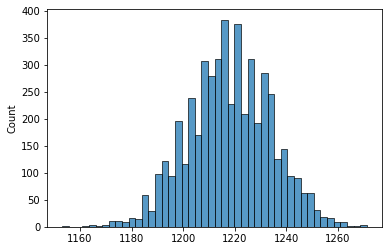

In [133]:
sns.histplot(data)

In [134]:
records = []

for st1 in range(0,100,5):
    for st2 in range(0,100,5):
        records.append({
            "st1" : st1,
            "st2" : st2,
            "dEU" : delta_expected_total_utility(value_lambda, st1, st2)
        })

In [135]:
list(range(0,100,5))

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [136]:
import pandas as pd

In [137]:
df = pd.DataFrame.from_records(records)

In [138]:
df

,st1,st2,dEU
0,0,0,0.000
1,0,5,-39.039
2,0,10,-91.091
3,0,15,-153.153
4,0,20,-200.200
...,...,...,...
395,95,75,1127.180
396,95,80,1096.156
397,95,85,1014.087
398,95,90,956.028


<AxesSubplot:xlabel='st2', ylabel='st1'>

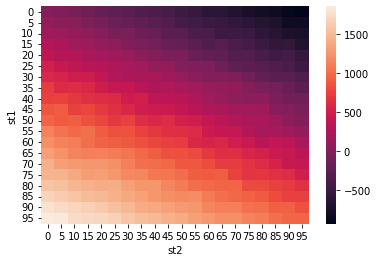

In [139]:
sns.heatmap(df.pivot("st1", "st2", "dEU"))

# Overall model

Alternate consumer and firm cycles.